In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
import statistics 
#sns.set(rc={'figure.figsize':(11.7,8.27)})

%matplotlib inline

In [2]:
df = pd.read_excel('AMZN.xls')

In [3]:
df.head()

,Date,Open,Close,High,Low,Volume
0,2016-01-04,656.289978,636.989990,657.719971,627.510010,9314500
1,2016-01-05,646.859985,633.789978,646.909973,627.650024,5822600
2,2016-01-06,622.000000,632.650024,639.789978,620.309998,5329200
3,2016-01-07,621.799988,607.940002,630.000000,605.210022,7074900
4,2016-01-08,619.659973,607.049988,624.140015,606.000000,5512900


In [4]:
df.tail()

,Date,Open,Close,High,Low,Volume
873,2019-06-24,1912.660034,1913.900024,1916.859985,1901.300049,2283000
874,2019-06-25,1911.839966,1878.270020,1916.390015,1872.420044,3012300
875,2019-06-26,1892.479980,1897.829956,1903.800049,1887.319946,2441900
876,2019-06-27,1902.000000,1904.280029,1911.239990,1898.040039,2141700
877,2019-06-28,1909.099976,1893.630005,1912.939941,1884.000000,3037400


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 6 columns):
Date      878 non-null datetime64[ns]
Open      878 non-null float64
Close     878 non-null float64
High      878 non-null float64
Low       878 non-null float64
Volume    878 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 41.2 KB


In [6]:
df.describe()

,Open,Close,High,Low,Volume
count,878.000000,878.000000,878.000000,878.000000,8.780000e+02
mean,1196.704578,1196.192335,1207.885171,1183.295149,4.452540e+06
std,455.641683,454.983054,460.630534,449.263283,2.246080e+06
min,478.010010,482.070007,493.500000,474.000000,1.458800e+06
25%,781.797485,781.352508,786.994995,774.957489,2.917650e+06
50%,1005.770019,1002.584991,1009.684998,997.045013,3.800050e+06
75%,1638.660004,1639.374970,1662.510010,1615.872498,5.305475e+06
max,2038.109985,2039.510010,2050.500000,2013.000000,1.656500e+07


In [7]:
df.isnull()

,Date,Open,Close,High,Low,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Date      0
Open      0
Close     0
High      0
Low       0
Volume    0
dtype: int64

In [9]:
df = df.set_index('Date')

In [10]:
df.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-06-17', '2019-06-18', '2019-06-19', '2019-06-20',
               '2019-06-21', '2019-06-24', '2019-06-25', '2019-06-26',
               '2019-06-27', '2019-06-28'],
              dtype='datetime64[ns]', name='Date', length=878, freq=None)

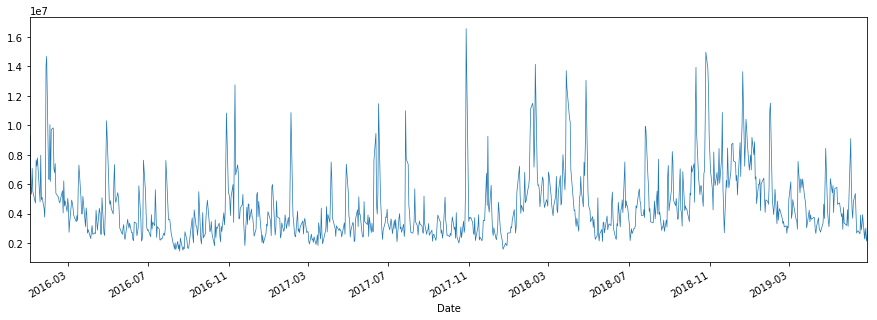

In [39]:
df['Volume'].plot(linewidth=0.7,figsize=(15, 5))

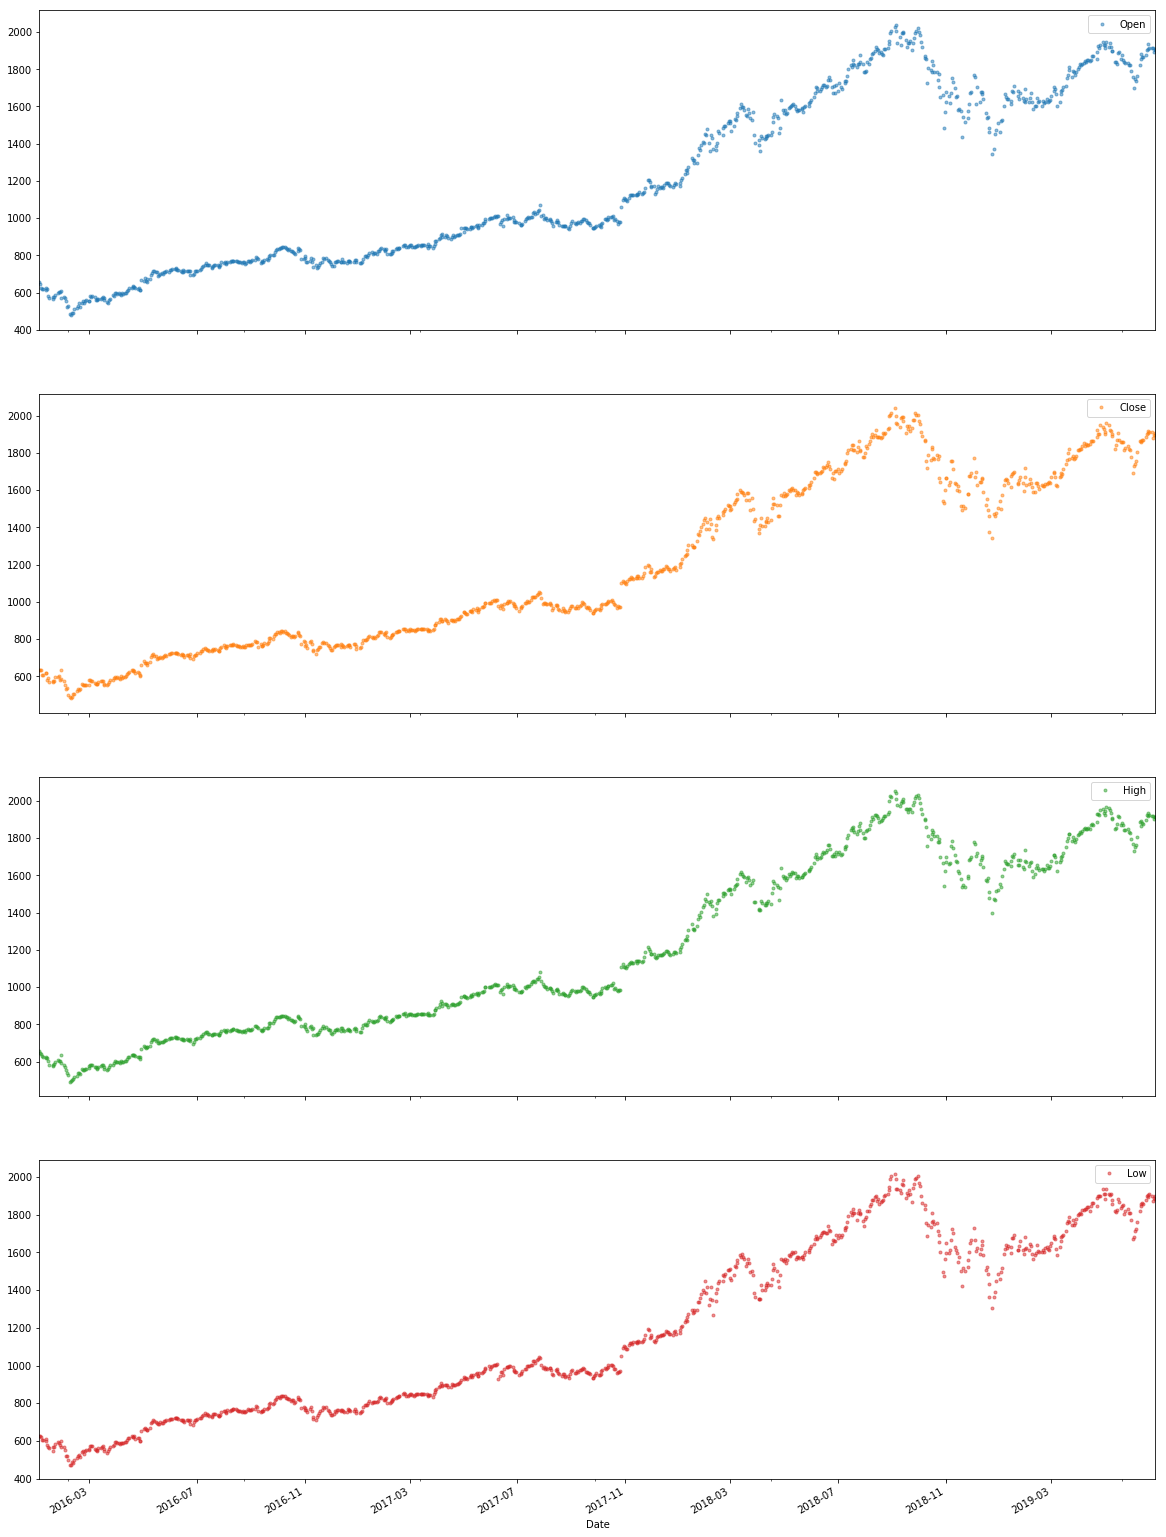

In [40]:
cols_plot = ['Open', 'Close', 'High', 'Low']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 30), subplots=True)


In [13]:
opening = df['Open']
closing = df['Close']

# Find sum of the numbers
closing_sum = sum(closing)
opening_sum = sum(opening)
#divide the sum with length of the list
mean_closing = closing_sum / len(closing)
mean_opening = opening_sum / len(opening)
print("Mean of the Opening price of AMZN stock is: " + str(round(mean_opening,4)))
print("Mean of the Closing price of AMZN stock is: " + str(round(mean_closing,4)))

Mean of the Opening price of AMZN stock is: 1196.7046
Mean of the Closing price of AMZN stock is: 1196.1923


In [35]:
# calculate variance using a list comprehension
var_opening = sum((xi - mean_opening) ** 2 for xi in opening) / len(opening)
var_closing = sum((xi - mean_closing) ** 2 for xi in closing) / len(closing)


print("Variance of the Opening price of AMZN stock is: " + str(round(var_opening,4)))
print("Variance of the Closing price of AMZN stock is: " + str(round(var_closing,4)))


Variance of the Opening price of AMZN stock is: 207372.8864
Variance of the Closing price of AMZN stock is: 206773.8055


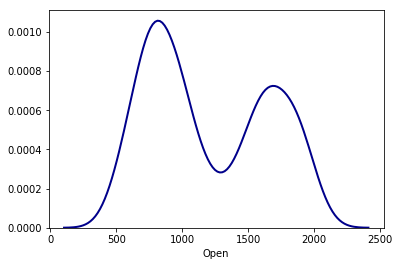

In [15]:
# Density Plot and Histogram of Closing Stock price
sns.distplot(df['Open'], hist=False, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})


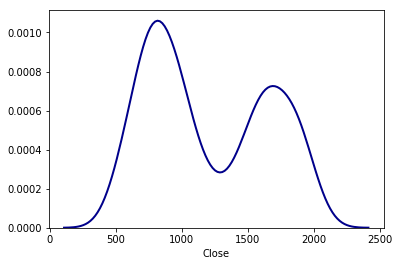

In [21]:
sns.distplot(df['Close'], hist=False, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

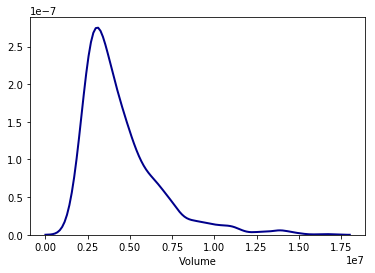

In [37]:
sns.distplot(df['Volume'], hist=False, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [28]:
sigma = var_closing**(1/2.0)
k_sum = 0
for i in range(0,len(df['Close'])):
    diff = (df.iloc[i]['Close'] - mean_closing)
    square = pow(diff,4)
    k_sum += square
num = k_sum/len(df)
den =  pow(sigma,4)
kurtosis = num/den
print(kurtosis)

1.56896637806
